In [792]:
# Importing all the libraries

import pandas as pd
import numpy as np
import random
import math
import statistics
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [793]:
# Reading the data and seeing it

df=pd.read_csv('data.csv')
df

,drill,hole,RUL,tf1,tf2,tf3,tf4,tf5,tf6,tf7,...,to607,to608,to609,to610,to611,to612,to613,to614,to615,to616
0,1,1,19,0,0,4.0348,17.8646,24.2476,32.7582,35.9497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,18,0,0,5.0986,31.6944,54.0348,65.7370,75.3114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,17,0,0,23.1837,48.7157,62.5455,73.1838,90.2051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4,16,0,0,10.4178,32.7582,52.9710,56.1625,60.4178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,5,15,0,0,5.0986,27.4391,45.5242,54.0348,59.3540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,14,40,4,0,0,1.0638,2.1277,2.1277,26.5958,54.2554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,14,41,3,0,0,14.8936,43.6171,67.0213,84.0426,95.7448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,14,42,2,0,0,4.2553,31.9149,56.3830,76.5958,90.4256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,14,43,1,0,0,2.1277,2.1277,2.1277,4.2553,29.7873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [794]:
# Creating a dataframe for last-5 holes of testing data

test=df[df['RUL']>0][180:]
df2=test[test['RUL']<=5]

In [795]:
df2

,drill,hole,RUL,tf1,tf2,tf3,tf4,tf5,tf6,tf7,...,to607,to608,to609,to610,to611,to612,to613,to614,to615,to616
206,11,17,5,0,0,20.2128,51.0639,71.2767,85.1064,96.8086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,11,18,4,0,0,2.1277,28.7234,58.5107,76.5958,89.3618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,11,19,3,0,0,22.3404,51.0639,72.3405,86.1703,97.8724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,11,20,2,0,0,8.5106,38.2979,63.8298,80.8511,93.6171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,11,21,1,0,0,15.9575,17.0213,17.0213,17.0213,18.0851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,12,15,5,0,0,1.0638,1.0638,1.0638,8.5106,38.2979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,12,16,4,0,0,1.0638,20.2128,46.8085,69.1490,82.9788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,12,17,3,0,0,1.0638,1.0638,1.0638,1.0638,10.6383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229,12,18,2,0,0,2.1277,24.4681,55.3192,72.3405,86.1703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,12,19,1,0,0,1.0638,2.1277,2.1277,2.1277,2.1277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [796]:
# Spliting into Train and Test Data

X_train=df[0:190].drop(columns=['RUL','drill'])
X_test=df[df['RUL']>0][180:].drop(columns=['RUL','drill'])
Y_train=df[0:190]['RUL']
Y_test=df[df['RUL']>0][180:]['RUL']

# Applying Min-Max scaling to Standardize data

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [797]:
# Creating X and Y values of last 5-holes of test data

x_last5=df2.drop(columns=['RUL','drill'])
x_last5=scaler.transform(x_last5)
y_last5=df2['RUL']

In [798]:
# Initializing MLPRegressor and fitting the training data

model= MLPRegressor(hidden_layer_sizes=[823],max_iter=100).fit(X_train,Y_train)

C:\Users\Mypc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [799]:
# Seeing the results of predicted RUL and viewing parallel to true values

Y_pred=model.predict(X_test)
y=Y_test.to_numpy()
Y_predtrain=model.predict(X_train)
yt=Y_train.to_numpy()
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), y.reshape(len(y),1)),1))

[[18.94 21.  ]
 [16.53 20.  ]
 [14.52 19.  ]
 [15.03 18.  ]
 [15.52 17.  ]
 [15.73 16.  ]
 [13.8  15.  ]
 [14.   14.  ]
 [14.64 13.  ]
 [ 9.17 12.  ]
 [11.35 11.  ]
 [10.93 10.  ]
 [10.68  9.  ]
 [ 9.73  8.  ]
 [ 7.16  7.  ]
 [ 5.36  6.  ]
 [ 4.64  5.  ]
 [ 4.31  4.  ]
 [ 4.36  3.  ]
 [ 2.87  2.  ]
 [ 2.07  1.  ]
 [19.33 19.  ]
 [14.31 18.  ]
 [14.43 17.  ]
 [13.83 16.  ]
 [14.24 15.  ]
 [13.11 14.  ]
 [ 6.44 13.  ]
 [14.17 12.  ]
 [13.25 11.  ]
 [12.3  10.  ]
 [13.45  9.  ]
 [10.46  8.  ]
 [ 8.32  7.  ]
 [ 5.69  6.  ]
 [ 5.53  5.  ]
 [ 5.06  4.  ]
 [ 1.95  3.  ]
 [ 3.14  2.  ]
 [ 1.24  1.  ]
 [19.83 43.  ]
 [14.99 42.  ]
 [15.85 41.  ]
 [14.24 40.  ]
 [14.81 39.  ]
 [14.79 38.  ]
 [15.12 37.  ]
 [14.09 36.  ]
 [14.76 35.  ]
 [13.94 34.  ]
 [12.21 33.  ]
 [13.82 32.  ]
 [12.48 31.  ]
 [11.85 30.  ]
 [11.26 29.  ]
 [12.8  28.  ]
 [14.16 27.  ]
 [14.26 26.  ]
 [12.38 25.  ]
 [12.4  24.  ]
 [12.46 23.  ]
 [10.91 22.  ]
 [ 9.94 21.  ]
 [11.   20.  ]
 [11.01 19.  ]
 [10.78 18.  ]
 [ 9.95 17

In [800]:
# Predicting for last 5 holes of test data

y_predlast5=model.predict(x_last5)

# Viewing the R-square value for training,last 5 holes and test data

rms = sqrt(mean_squared_error(Y_test,Y_pred))
rms5= sqrt(mean_squared_error(y_last5,model.predict(x_last5)))
print(r2_score(Y_predtrain.reshape(len(Y_predtrain),1),yt.reshape(len(yt),1)))
print(r2_score(y_last5,y_predlast5))
print(r2_score(Y_test,Y_pred.reshape(len(Y_pred),1)))



0.8976606782133674
0.357985048715573
0.006639851872814462


In [802]:
#RMSE for trainig

rmse_train = sqrt(mean_squared_error(Y_predtrain,Y_train))
rmse_train

1.7087881930371185

In [803]:
# RMSE for Test

rmse_test = sqrt(mean_squared_error(Y_pred,Y_test))
rmse_test

11.974893305681393

In [804]:
# Evaluating RMSE for last 5 holes of last 4 drills

rmse_d11=sqrt(mean_squared_error(y_predlast5[0:5],[5,4,3,2,1]))
rmse_d12=sqrt(mean_squared_error(y_predlast5[5:10],[5,4,3,2,1]))
rmse_d13=sqrt(mean_squared_error(y_predlast5[10:15],[5,4,3,2,1]))
rmse_d14=sqrt(mean_squared_error(y_predlast5[15:20],[5,4,3,2,1]))

# Final Performance calculation
rms2=statistics.median([rmse_d11,rmse_d12,rmse_d13,rmse_d14])

In [805]:
rms2


0.8844857205597026

Text(0.5, 1.0, 'Drill-11')

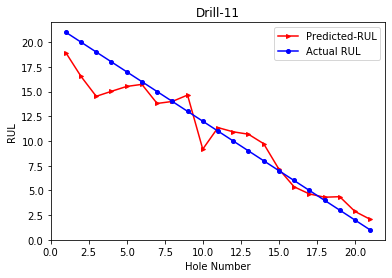

In [806]:
# Visualizing predicted and actual RUL for drill-11

plt.plot(scaler.inverse_transform(X_test)[0:21,0],model.predict(X_test)[0:21],'r>-', markersize=4)
plt.plot(scaler.inverse_transform(X_test)[0:21,0],Y_test[0:21],'bo-', markersize=4)
plt.legend(["Predicted-RUL", "Actual RUL"], loc ="upper right")
plt.xlabel('Hole Number')
plt.ylabel('RUL')
plt.title('Drill-11')

Text(0.5, 1.0, 'Drill-12')

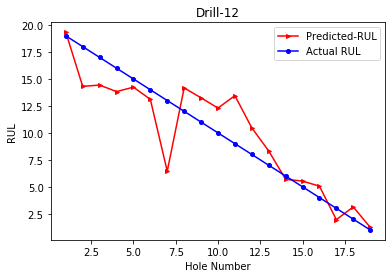

In [807]:
# Visualizing predicted and actual RUL for drill-12

plt.plot(scaler.inverse_transform(X_test)[21:40,0],model.predict(X_test)[21:40],'r>-', markersize=4)
plt.plot(scaler.inverse_transform(X_test)[21:40,0],Y_test[21:40],'bo-', markersize=4)
plt.legend(["Predicted-RUL", "Actual RUL"], loc ="upper right")
plt.xlabel('Hole Number')
plt.ylabel('RUL')
plt.title('Drill-12')

Text(0.5, 1.0, 'Drill-13')

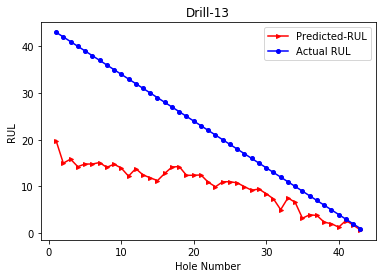

In [808]:
# Visualizing predicted and actual RUL for drill-13

plt.plot(scaler.inverse_transform(X_test)[40:83,0],model.predict(X_test)[40:83],'r>-', markersize=4)
plt.plot(scaler.inverse_transform(X_test)[40:83,0],Y_test[40:83],'bo-', markersize=4)
plt.legend(["Predicted-RUL", "Actual RUL"], loc ="upper right")
plt.xlabel('Hole Number')
plt.ylabel('RUL')
plt.title('Drill-13')

Text(0.5, 1.0, 'Drill-14')

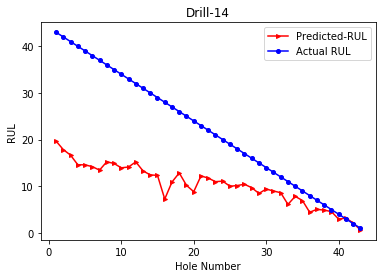

In [809]:
# Visualizing predicted and actual RUL for drill-14

plt.plot(scaler.inverse_transform(X_test)[83:126,0],model.predict(X_test)[83:126],'r>-', markersize=4)
plt.plot(scaler.inverse_transform(X_test)[83:126,0],Y_test[83:126],'bo-', markersize=4)
plt.legend(["Predicted-RUL", "Actual RUL"], loc ="upper right")
plt.xlabel('Hole Number')
plt.ylabel('RUL')
plt.title('Drill-14')

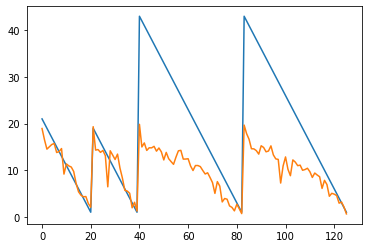

In [810]:
# A combined ROUGH grpah for predicted RUL and Actual RUL of test data

plt.plot(Y_test.reset_index(drop=True))
plt.plot(model.predict(X_test))
plt.show()

In [811]:
# Applying Simulated Annealing to optimize the number of neurons in Hidden Layer

T_i = 1000           # Inital Temperature   
T_change = 20        # Cooling Rate
T_current = 1000     # Current temperature
f_best=500           # taking large value as we have to minimize
f_init= rms2         # initial Median RMSE w/o SA
x_best= 823          # inital neurons
max_it = 25          # max iterations
neuron= 0            # neurons put 0 as some value needed to be entered

@ignore_warnings(category=ConvergenceWarning)

# Function to calculate f-objective i.e Median RMSE

def f(x):
    model=MLPRegressor(hidden_layer_sizes=[x],max_iter=100).fit(X_train,Y_train)
    y_predlast5=model.predict(x_last5)
    rmse_d11=sqrt(mean_squared_error(y_predlast5[0:5],[5,4,3,2,1]))
    rmse_d12=sqrt(mean_squared_error(y_predlast5[5:10],[5,4,3,2,1]))
    rmse_d13=sqrt(mean_squared_error(y_predlast5[10:15],[5,4,3,2,1]))
    rmse_d14=sqrt(mean_squared_error(y_predlast5[15:20],[5,4,3,2,1]))

    rms5=statistics.median([rmse_d11,rmse_d12,rmse_d13,rmse_d14])
    return rms5

# Performing iterations

for it in range(max_it):
    x_current= random.randrange(1,1232)     # Generating Random Solution
    f_current=f(x_current)                  # Calculating f-obj
    if f_current<=f_best:                   # checing the conditions to select the current solution or not
        f_best=f_current
        x_best=x_current
    elif f_current>f_best:
        probability = math.exp((f_best-f_current)/T_current)
        rn = random.uniform(0, 1)
        if rn<=probability:
            f_best=f_current
            x_best=x_current
        
    T_current=T_current-T_change            # Changing the temperature
    neuron=x_best                           # number of neurons after SA

if f_best<f_init:                           # Checking whether SA improved RMSE or not
    print('After applying Simulated Annealing to optimize hidden neurons,we get a better Median RMS value of {:0.3f} as compared to {:0.3f} previously'.format(f_best,f_init))
    print('Optimal neurons in Hidden layer should be: {}'.format(neuron))
else:
    print('No improvement in Median RMS value after Simulated Annealing')
    print('Number of neurons in Hidden Layer is 823')
    

No improvement in Median RMS value after Simulated Annealing
Number of neurons in Hidden Layer is 823


In [812]:
print('Optimal neurons from SA is: {}'.format(x_best))
print('Median RMSE from SA is: {:0.3f}'.format(f_best))


Optimal neurons from SA is: 1180
Median RMSE from SA is: 1.021
